In [1]:
import networkx as nx

from regraph.audit import VersionedGraph
from regraph.rules import Rule
from regraph import print_graph, plot_rule, plot_graph

In [2]:
g = VersionedGraph(nx.DiGraph())

In [3]:
rule = Rule.from_transform(nx.DiGraph())
rule.inject_add_node("a")
rule.inject_add_node("b")
rule.inject_add_edge("a", "b")

/home/eugenia/anaconda3/envs/kami/lib/python3.7/site-packages/matplotlib-3.0.3-py3.7-linux-x86_64.egg/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


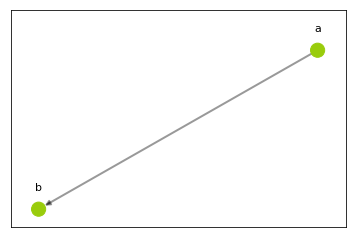

{'a': array([0.56927227, 1.        ]), 'b': array([-0.56927227, -1.        ])}

In [4]:
rhs_instance, _ = g.rewrite(rule, {}, message="Add a -> b")
plot_graph(g.graph)

In [5]:
g.branch("branch")

In [6]:
pattern = nx.DiGraph()
pattern.add_node("b")
rule = Rule.from_transform(pattern)
rule.inject_clone_node("b")

('b1', 'b1')

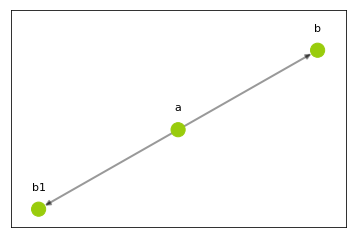

{'a': array([ 1.08801130e-06, -1.51350221e-06]),
 'b': array([0.99999891, 0.71887034]),
 'b1': array([-1.        , -0.71886883])}

In [7]:
g.rewrite(rule, {"b": rhs_instance["b"]}, message="Clone b")
plot_graph(g.graph)

In [8]:
g.switch_branch("master")

In [9]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_add_node("c")
rule.inject_add_edge("c", "a")
rule.inject_add_edge("a", "a")

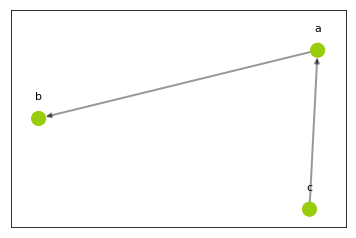

{'a': array([0.52211687, 0.87151422]),
 'b': array([-1.        ,  0.08623502]),
 'c': array([ 0.47788313, -0.95774923])}

In [10]:
rhs_instance, _ = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Add c and c->a")
plot_graph(g.graph)

In [11]:
g.branch("dev")

In [12]:
pattern = nx.DiGraph()
pattern.add_node("c")
pattern.add_node("a")
pattern.add_edge("c", "a")
rule = Rule.from_transform(pattern)
rule.inject_remove_edge("c", "a")
rule.inject_merge_nodes(["c", "a"])

'a_c'

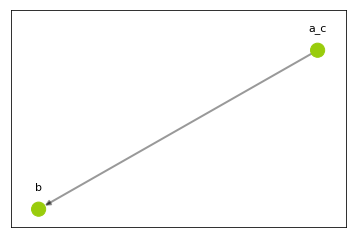

{'b': array([-1.        , -0.80150673]),
 'a_c': array([1.        , 0.80150673])}

In [13]:
g.rewrite(rule, {"a": rhs_instance["a"], "c": rhs_instance["c"]}, message="Merge c and a")
plot_graph(g.graph)

In [14]:
g.branches()

['master', 'branch', 'dev']

In [15]:
g.switch_branch("master")

In [16]:
g.current_branch()

'master'

In [17]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
_, rhs_clone = rule.inject_clone_node("a")

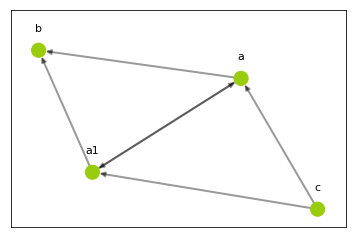

{'b': array([-0.92177325,  0.92084113]),
 'c': array([ 1.        , -0.97351175]),
 'a': array([0.472871  , 0.58553049]),
 'a1': array([-0.55109775, -0.53285986])}

In [18]:
rhs_instance, rollback_commit = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Clone a")
plot_graph(g.graph)

In [19]:
g.branch("test")

In [20]:
print(g._deltas["master"]["rule"])

Preserved part
[]
[]
Left hand side
[]
[]
P->L Homomorphism : {}
Right hand side
[]
[]
P->R Homomorphism : {}



In [21]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_add_node("d")
rule.inject_add_edge("a", "d")

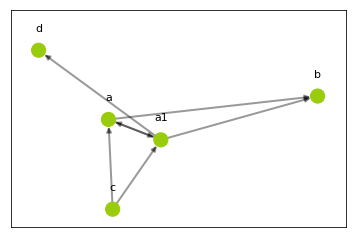

{'b': array([1.        , 0.27409751]),
 'c': array([-0.20567315, -0.87889202]),
 'a': array([-0.23064971,  0.03578927]),
 'a1': array([ 0.07773077, -0.17213524]),
 'd': array([-0.64140791,  0.74114048])}

In [22]:
g.rewrite(rule, {"a": rhs_instance[rhs_clone]}, message="Add d -> clone of a")
plot_graph(g.graph)

In [23]:
print(g._deltas["master"]["rule"])

Preserved part
['a']
[]
Left hand side
['a', 'd']
[('a', 'd')]
P->L Homomorphism : {'a': 'a'}
Right hand side
['a']
[]
P->R Homomorphism : {'a': 'a'}



In [24]:
g.switch_branch("master")

In [25]:
print(g._deltas["test"]["rule"])

Preserved part
['a']
[]
Left hand side
['a']
[]
P->L Homomorphism : {'a': 'a'}
Right hand side
['a', 'd']
[('a', 'd')]
P->R Homomorphism : {'a': 'a'}



In [26]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_remove_node("a")

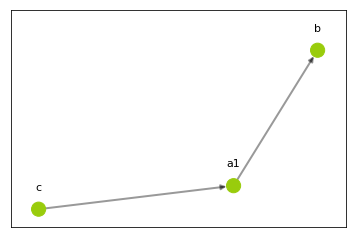

{'b': array([0.76594122, 0.92457033]),
 'c': array([-1.        , -0.57299008]),
 'a1': array([ 0.23405878, -0.35158025])}

In [27]:
rhs_instance, _ = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Remove a")
plot_graph(g.graph)

In [28]:
print(g._deltas["test"]["rule"])

Preserved part
['b', 'a1', 'c']
[]
Left hand side
['b', 'a1', 'c']
[]
P->L Homomorphism : {'b': 'b', 'a1': 'a1', 'c': 'c'}
Right hand side
['a', 'd', 'a_1', 'b', 'c']
[('a', 'd'), ('a_1', 'b'), ('a_1', 'a_1'), ('a_1', 'a'), ('c', 'a_1')]
P->R Homomorphism : {'b': 'b', 'a1': 'a', 'c': 'c'}



In [29]:
g.branches()

['master', 'branch', 'dev', 'test']

In [30]:
g.merge_with("dev")

>>>


TypeError: tuple indices must be integers or slices, not str

In [ ]:
plot_rule(g._deltas["test"]["rule"])

In [ ]:
print(g.branches())

In [ ]:
plot_graph(g.graph)

In [ ]:
print(g._deltas["test"]["rule"])

In [ ]:
g.merge_with("test")

In [ ]:
plot_graph(g.graph)

In [ ]:
g.graph.edges()

In [ ]:
for n in g._revision_graph.nodes():
    print(n, g._revision_graph.node[n]["branch"], g._revision_graph.node[n]["message"])

In [ ]:
g.rollback(rollback_commit)
plot_graph(g._revision_graph)
plot_graph(g.graph)